## **第五章 组成图 Composition**

组成图是描述样本类别组成的图像，它能够直观表达一组数据集中有什么样的类别，并展现出不同类别所占的比例<br>
组成图往往有绚丽的色彩，在某一类别占比很大的时候能够让该类别非常显眼，所以是商业报告&PPT最佳伴侣！<br>
典型的组成图有：人民群众最熟悉的饼图，树形图和华夫饼图

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/%E7%BB%84%E6%88%90%E5%9B%BE.PNG" align="center" />

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

## 第五期 组成图：31华夫饼图，32饼图，33树状图，34条形图

## o新知识点

1.bbox_to_anchor

2.df_class.itertuples()每次打dataframe的一行<br>  zip(x,y)和c_(x,y)一一对应打包成元组、列表的可循环对象

3.plots = {"图像位置":{"每一个和华夫饼有关的参数":参数的值}}

4.autopct=lambda x: "{:.2f}% ({:d})".format(x,int(x/100.*np.sum(data)))

5.随机选颜色，从颜色库

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 31/50 华夫饼图

华夫饼图又叫做方形饼图(square chart)，是一种以方形饼图展示不同类别占比的组成图，通常为10x10网格(100个)，其中每个单元格代表1％的占比。 

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/31%20%E5%8D%8E%E5%A4%AB%E9%A5%BC%E5%9B%BE.PNG" align="center" />

没有横坐标和纵坐标  
只有标题和图例，从图例中可以看出，一种颜色一种类别  
三张图的类别分别是：Class(车辆类型)，Cyl(气缸数量)，Make(汽车制造商)  

### 1. 导入需要的绘图库&基本设置

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### 2. 认识绘制华夫饼的库

#### **pywaffle.waffle.Waffle**  
Python + 华夫饼的英文单词waffle形成的库pywaffle，是专门为matplotlib设计的，用来绘制一系列饼图的库  
其中的Waffle模块是专门绘制华夫饼图的，但神奇的是，我们不通过任何函数来实现这个功能  
这个库需要单独安装，大家可以运行以下代码进行安装：

In [3]:
#导入华夫饼库中的华夫饼图像类型
from pywaffle import Waffle # pip install pywaffle

In [4]:
Waffle #pywaffle库，waffle模块中的Waffle图像类型

pywaffle.waffle.Waffle

In [5]:
type(Waffle) #本身就是一种类型

type

> **重要参数**
>> **FigureClass**：图像的类型，绘制华夫饼时我们在这里输入Waffle，这是我们导入后的Waffle图像类型  
>> **rows**：条形图在y轴上的起点，也就是长条的最下边  
>> **values**：条形图在y轴上的终点，也就是长条的最上边  
>> **loc**：图例的位置  
>> **bbox_to_anchor**：一种更加精确地显示图例位置的方式，当bbox_to_anchor参数存在时，会以参数中输入的坐标为参考点，再考虑loc来设置图图例的位置<br>
>> **icons**: 样式

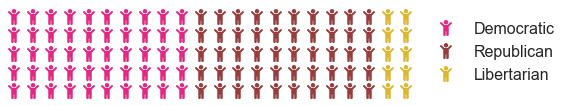

In [7]:
#先画一块饼看看吧

data = {'Democratic': 50, 'Republican': 50, 'Libertarian': 10} #数据集以字典的形式表示，这里表示三种类别
# 改data就可以


fig = plt.figure(
    figsize=(8,3), #画布的尺寸
    
    values=data, #数据
    FigureClass=Waffle,  #画布的类型：华夫饼图 - 没有横纵坐标，只有格子
    rows=5, #华夫饼图要有多少行
    colors=("#E22882", "#983D3D", "#DCB732"), #颜色的数量必须要与数据中的类别数量一致，否则报错
    legend={'loc': 'upper left' #图例输入loc，可以控制图例所在的位置
            , 'bbox_to_anchor': (1, 1) #元组，定点
           }, # 字典，相当于figdict
    
    icons='child', icon_size=16, 
    icon_legend=True
)

#loc与bbox_to_anchor用法梳理
#plt.scatter([1],[1]
#            ,zorder=2 #图层的位置，越大越上
#            ,c="k");

### bbox_to_anchor用法梳理

bbox_to_anchor = (0.5, 0.5) 宽和高的0.5倍，依赖于整个画布

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/bbox_to_anchor%E7%94%A8%E6%B3%952.png" align="center" />

bbox_to_anchor = (0.5, 0.5, 0.1, 0.4) 以（.5,.5）为矩形左下角

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/bbox_to_anchor%E7%94%A8%E6%B3%951.png" align="center" />

华夫饼图的数据一定得输入百分比吗？其实不一定~

### 3. 处理绘图用的数据

In [8]:
#导入数据
df_raw = pd.read_csv("data/mpg_ggplot2.csv")

In [9]:
df_raw.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [10]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份","气缸数量","手动/自动"
        ,"驱动类型","城市里程/加仑","公路里程/加仑","汽油种类","车辆种类"]

#驱动类型：四轮，前轮，后轮
#能源种类：汽油，柴油，用电等等
#车辆种类：皮卡，SUV，小型，中型等等
#城市里程/加仑，公路里程/加仑：表示使用每加仑汽油能够跑的英里数，所以这个数值越大代表汽车越节能

我们需要向华夫饼图输入类别和类别对应的数量  
df_class = df_raw.groupby('class').size().reset_index(name='counts')

In [11]:
df_raw.groupby("class").size() #提取出按照class来聚合之后每个类别下的样本数量

class
2seater        5
compact       47
midsize       41
minivan       11
pickup        33
subcompact    35
suv           62
dtype: int64

In [12]:
df_raw.groupby("class").size().reset_index() #重新设立索引，并且将原来为索引的内容当作另一个特征放到DataFrame

,class,0
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


In [13]:
df_class = df_raw.groupby('class').size().reset_index(name='counts')

In [14]:
df_class #按照车辆的类型聚合出来的全部数据，每个车辆类型下的样本计数

,class,counts
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


使用光谱和列表推倒式准备颜色  
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

In [15]:
plt.cm.inferno_r(0.5) #RGBA inferno_r色谱

(0.729909, 0.212759, 0.333861, 1.0)

In [16]:
n_categories = df_class.shape[0]
n_categories #车辆有7种类型

7

In [17]:
for i in range(n_categories):
    print(plt.cm.inferno_r(i/float(n_categories)))

(0.988362, 0.998364, 0.644924, 1.0)
(0.981173, 0.759135, 0.156863, 1.0)
(0.961293, 0.488716, 0.084289, 1.0)
(0.832299, 0.283913, 0.257383, 1.0)
(0.621685, 0.164184, 0.388781, 1.0)
(0.397674, 0.083257, 0.433183, 1.0)
(0.15585, 0.044559, 0.325338, 1.0)


In [18]:
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]
colors

[(0.988362, 0.998364, 0.644924, 1.0),
 (0.981173, 0.759135, 0.156863, 1.0),
 (0.961293, 0.488716, 0.084289, 1.0),
 (0.832299, 0.283913, 0.257383, 1.0),
 (0.621685, 0.164184, 0.388781, 1.0),
 (0.397674, 0.083257, 0.433183, 1.0),
 (0.15585, 0.044559, 0.325338, 1.0)]

依然列表推倒式，准备图例  
[n[1] for n in df_class.itertuples()]

In [19]:
df_class["class"].values.tolist()

['2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact', 'suv']

In [20]:
df_class

,class,counts
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


In [21]:
#itertuples：将一个dataframe的行当作元祖来进行循环的函数，有点类似与lambda，都是对DataFrame中的每行/每列中的对象进行操作
[*df_class.itertuples()]
# 每次打dataframe的一行
# zip(x,y)和c_(x,y)一一对应打包成元组、列表的可循环对象

[Pandas(Index=0, _1='2seater', counts=5),
 Pandas(Index=1, _1='compact', counts=47),
 Pandas(Index=2, _1='midsize', counts=41),
 Pandas(Index=3, _1='minivan', counts=11),
 Pandas(Index=4, _1='pickup', counts=33),
 Pandas(Index=5, _1='subcompact', counts=35),
 Pandas(Index=6, _1='suv', counts=62)]

In [22]:
for n in df_class.itertuples():
    print(n)
#元祖中有三个对象：索引，第一列“车辆类型”，第二列“计数”

Pandas(Index=0, _1='2seater', counts=5)
Pandas(Index=1, _1='compact', counts=47)
Pandas(Index=2, _1='midsize', counts=41)
Pandas(Index=3, _1='minivan', counts=11)
Pandas(Index=4, _1='pickup', counts=33)
Pandas(Index=5, _1='subcompact', counts=35)
Pandas(Index=6, _1='suv', counts=62)


In [23]:
n

Pandas(Index=6, _1='suv', counts=62)

In [24]:
n[0]

6

In [25]:
n[1]

'suv'

In [26]:
n[2]

62

In [27]:
[n[1] for n in df_class.itertuples()]

['2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact', 'suv']

In [28]:
#其实完全没必要
df_class["class"].values.tolist()

['2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact', 'suv']

In [29]:
#数据准备（占比，颜色以及标签）

#按车辆类型
df_class = df_raw.groupby('class').size().reset_index(name='counts_class')
n_categories = df_class.shape[0]
#colors_class = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]
colors_class = [plt.cm.nipy_spectral(i/float(n_categories)) for i in range(n_categories)] #更换成了更容易查看的颜色
labels_class = [n[1] for n in df_class.itertuples()] #更加简单的写法

#按气缸数量
df_cyl = df_raw.groupby('cyl').size().reset_index(name='counts_cyl')
n_categories = df_cyl.shape[0]
#colors_cyl = [plt.cm.Spectral(i/float(n_categories)) for i in range(n_categories)]
colors_cyl = [plt.cm.nipy_spectral(i/float(n_categories)) for i in range(n_categories)]
labels_cyl = [n[1] for n in df_cyl.itertuples()]

#按制造商
df_make = df_raw.groupby('manufacturer').size().reset_index(name='counts_make')
n_categories = df_make.shape[0]
#colors_make = [plt.cm.tab20b(i/float(n_categories)) for i in range(n_categories)]
colors_make = [plt.cm.nipy_spectral(i/float(n_categories)) for i in range(n_categories)]
labels_make = [n[1] for n in df_make.itertuples()]

### 4. 绘制华夫饼图

plots = {"图像位置":{"每一个和华夫饼有关的参数":参数的值}}

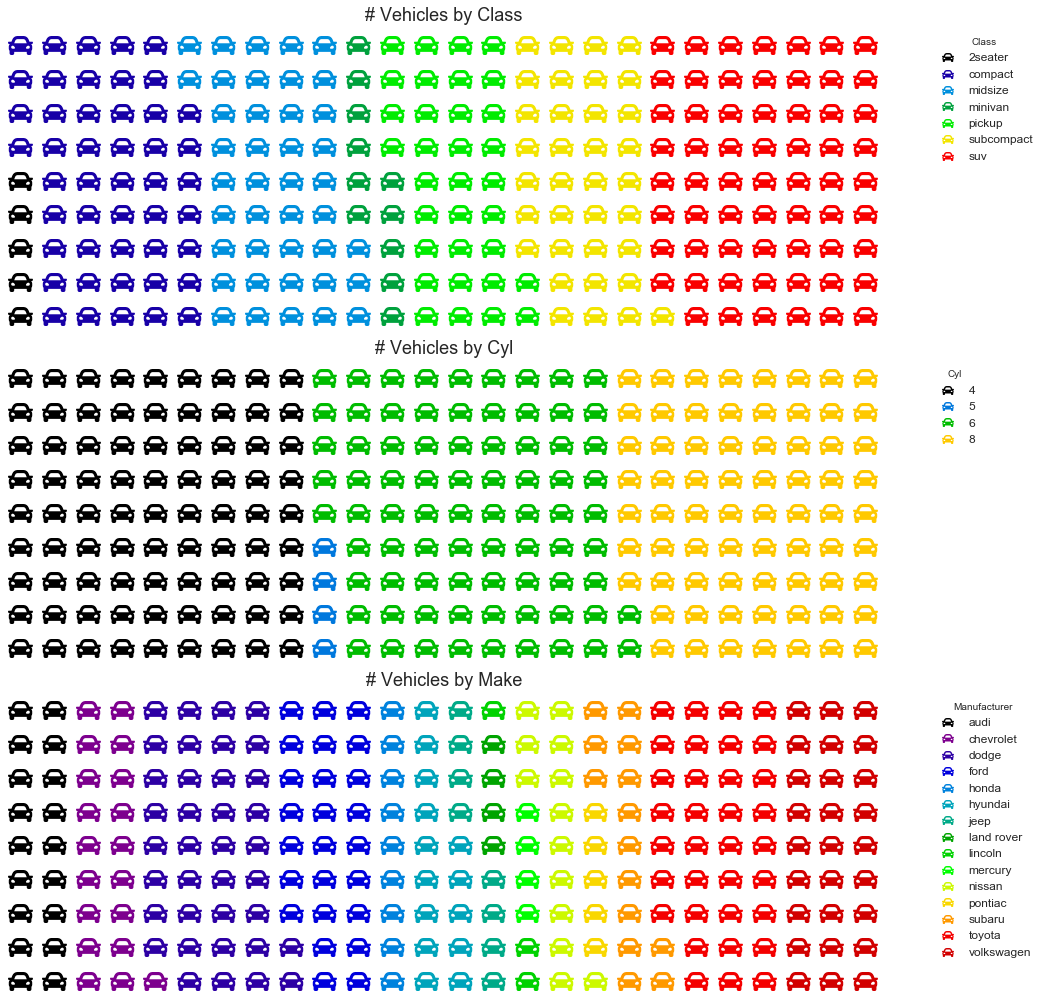

In [37]:
#绘图
fig = plt.figure(
    FigureClass=Waffle, #绘制华夫饼图
    plots={ #绘制多个图像
        '311': #这里的数字表示，3行，1列，索引为1的图
        {'values': df_class['counts_class'], #数据集
         'labels': labels_class, #标签
         'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Class'},
         'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18},
         'colors': colors_class
        },
        '312': {
            'values': df_cyl['counts_cyl'],
            'labels': labels_cyl,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Cyl'},
            'title': {'label': '# Vehicles by Cyl', 'loc': 'center', 'fontsize':18},
            'colors': colors_cyl
        },
        '313': {
            'values': df_make['counts_make'],
            'labels': labels_make,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Manufacturer'},
            'title': {'label': '# Vehicles by Make', 'loc': 'center', 'fontsize':18},
            'colors': colors_make,    
        }
    },
    rows=9, #华夫饼图有多少行
    figsize=(16, 14),
    icons='car', icon_size=25, 
    icon_legend=True #显示icons图例
)

# 加文本
# plt.text(1,1,'0',fontsize=20,c='g',zorder=2 )#图层的位置，越大越上
# plt.show()

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

在使用icon时，你可能会遇见报错的情况：

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/mistake.PNG" align="center" />

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/mistake2.PNG" align="center" />

**如果你出现类似的报错，请参考下面的步骤解决问题：**  
  
**1. 进入网址：https://fontawesome.com/download**  
**2. 点击Free for Desktop进行下载**

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/Sketch001.jpg" align="center" />

**3. 找到fontawesome-free-5.8.1-desktop文件夹，点击进入，找到文件夹otfs中的文件：**

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/%E4%B8%89%E4%B8%AA%E6%96%87%E4%BB%B6.PNG" align="center" />

**4. 把三个otf文件复制到你的Python安装目录的字体文件夹下：C:\Python\Lib\site-packages\font**

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/%E7%BB%93%E6%9E%9C.PNG" align="center" />

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 5. 解读图像 & 华夫饼图展开

二分类的华夫饼：常用于企业KPI数据，完成任务了么？完成了多少？

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/Waffle-Chart-in-Excel-Example.png" align="center" />

>华夫饼适合什么时候用呢？
>> 比较许多同一层级的不同类型，并探索这些类型如何对整体做出贡献  
>> 整体中的某一部分占比巨大  
>> 使用KPI图表作为总数的百分比  

> 什么时候不应该用华夫饼？
>> 当对整体有贡献的类别太多的时候，华夫饼图能够展现的组成情况有限  
>> 测量的KPI或者总贡献可以超过100%时  
>> 华夫饼展现出“大概的比例”，当精确的占比（比如百分比数量）非常重要的时候，必须借助文字帮助

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 32/50 饼图

饼图是最典型的组成图，是我们可能除了条形图、折线图之外最熟悉的图像——没有横纵坐标，只有饼和图例文字

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/Pie%20Chart.PNG" align="center" />

思考：你会怎样绘制这样一张图呢？

### 1. 导入需要的库

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### 2. 导入数据，准备数据

In [4]:
df_raw = pd.read_csv("data/mpg_ggplot2.csv")

输入的数据

In [5]:
df_raw.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [6]:
df = df_raw.groupby('class').size().reset_index(name='counts')
df

,class,counts
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


### 3. 认识绘制饼图的函数

#### ax.pie/plt.pie

> x：pie函数中唯一的必填参数，每个类别的计数  
> autopct：设定写在扇叶上的百分比，默认None，可以输入None或者format函数表示的字符串

In [7]:
data = df['counts'] #需要输入的数据集

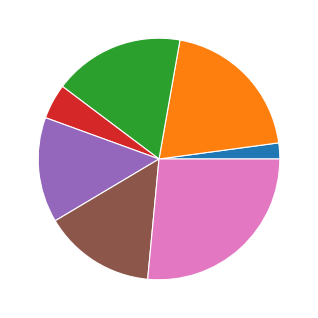

In [8]:
fig, ax = plt.subplots(figsize=(5, 5), dpi= 80)
ax.pie(data); #autopct=None

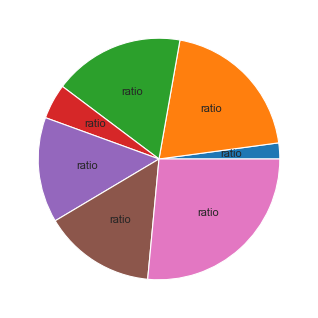

In [10]:
fig, ax = plt.subplots(figsize=(5, 5), dpi= 80)
ax.pie(data, autopct='ratio');  # autopct为string

In [11]:
"我想显示的格式{}".format(53)

'我想显示的格式53'

In [12]:
"The amount is:{}".format(26)

'The amount is:26'

In [13]:
i=26
f"The amount is:{i}"

'The amount is:26'

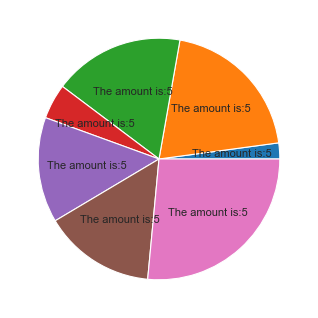

In [26]:
fig, ax = plt.subplots(figsize=(5, 5), dpi= 80)
ax.pie(data, autopct="The amount is:{}".format(5));  # 设定写在扇叶上的百分比,不赋值返回x

In [ ]:
#lambda x: 在一个序列当中，对每一个元素分别进行操作

In [15]:
df.counts

0     5
1    47
2    41
3    11
4    33
5    35
6    62
Name: counts, dtype: int64

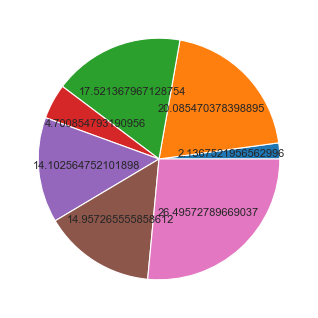

In [27]:
fig, ax = plt.subplots(figsize=(5, 5), dpi= 80)
ax.pie(data, autopct=lambda x:"{:.2f}% ({} )".format(x,int(x/100*df.counts.sum())));
# x是百分比 x/100*df.counts.sum()为个数

In [52]:
#你注意到如果使用匿名函数，每个x是什么了吗？

In [73]:
df

,class,counts
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


In [18]:
ratio = df.loc[0,"counts"]*100/df.counts.sum()

In [19]:
#ratio = 每个类别下的计数/所有类别下的样本总数
ratio = df.loc[0,"counts"]*100/(df.counts.sum())

In [20]:
int(ratio/100 * df.counts.sum())

5

In [23]:
#"{比例}({计数})".format(比例，比例*样本总数/100)
"{:.1f}% ({:d})".format(ratio,int(ratio/100*(df.counts.sum())))

'2.1% (5)'

In [ ]:
#在我们绘制饼图的函数中，参数autopct帮助我们计算各类的比例，我们可以使用lambda函数来替代索引
#autopct=lambda x: "{:.2f}% ({:d})".format(x,int(x/100.*np.sum(data)))

#### 为什么说绘制饼图是处于使用函数和使用对象之间？

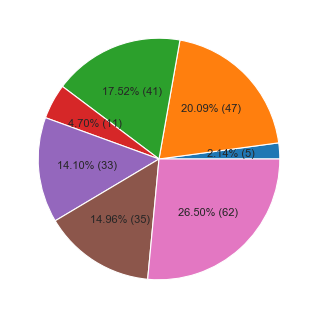

In [28]:
fig, ax = plt.subplots(figsize=(5, 5), dpi= 80)
wedges, texts, autotexts = ax.pie(x=data,
                                  autopct=lambda x: "{:.2f}% ({:d})".format(x,int(x/100.*np.sum(data))))

In [59]:
#### 生成的wedges，texts和autotexts都是什么？

In [29]:
wedges #七个扇叶，每个都是一个补丁对象

In [30]:
texts #七个扇叶分别的位置

[Text(1.0975225342306456, 0.07378541086109972, ''),
 Text(0.7933226822456274, 0.7619967990973475, ''),
 Text(-0.40383832372764283, 1.023188451991542, ''),
 Text(-0.9670509719865016, 0.5242255407550863, ''),
 Text(-1.0951459098588818, -0.10322517192701731, ''),
 Text(-0.5879123013284802, -0.9297091620214627, ''),
 Text(0.7404231332579032, -0.8134946734530898, '')]

In [31]:
autotexts #七个扇叶所对应的文字

[Text(0.5986486550348976, 0.04024658774241802, '2.14% (5)'),
 Text(0.43272146304306947, 0.41563461768946225, '20.09% (47)'),
 Text(-0.22027544930598697, 0.5581027919953864, '17.52% (41)'),
 Text(-0.5274823483562735, 0.28594120404822887, '4.70% (11)'),
 Text(-0.5973523144684809, -0.05630463923291852, '14.10% (33)'),
 Text(-0.3206794370882619, -0.5071140883753432, '14.96% (35)'),
 Text(0.4038671635952199, -0.44372436733804893, '26.50% (62)')]

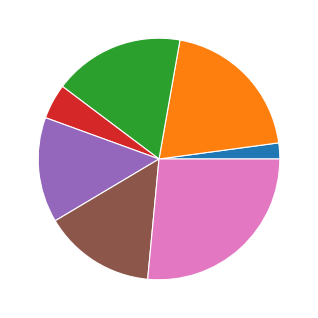

In [32]:
#当参数autopct等于None的时候
fig, ax = plt.subplots(figsize=(5, 5), dpi= 80)
wedges, texts = ax.pie(data);

### 4. 代码解读

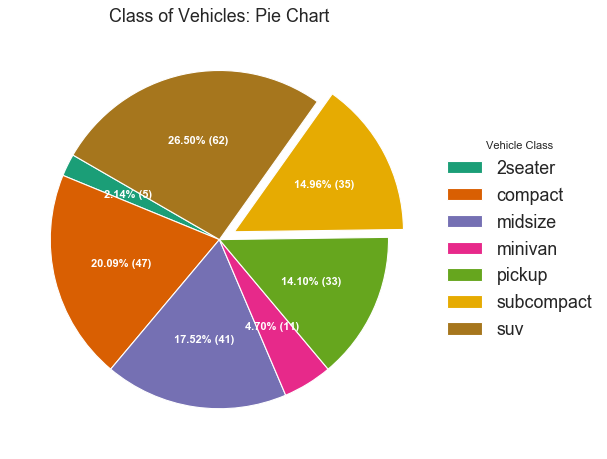

In [35]:
#数据准备
data = df['counts'] #需要输入的数据集
explode = [0,0,0,0,0,0.1,0]  #0.1离开

#绘制图像
fig, ax = plt.subplots(figsize=(7, 7), dpi= 80)

wedges, texts, autotexts = ax.pie(x=data,
                                   autopct=lambda x: "{:.2f}% ({:d})".format(x,int(x/100.*np.sum(data))),
                                   colors=plt.cm.Dark2.colors, #图形的颜色，8类颜色舍弃最后
                                   startangle=150, #第一瓣扇叶从什么角度开始
                                   explode=explode #扇叶与扇叶之间的距离
                                  )

#装饰图像
categories = df['class'] #选取图例
ax.legend(categories #输入数据
          , title="Vehicle Class" #图例的标题
          , loc="center left"
          , bbox_to_anchor=(1, 0, 0.5, 1) #还记得bbox_to_anchor的用法么？
         ) 
ax.set_title("Class of Vehicles: Pie Chart")
plt.setp(autotexts, size=10, weight=700, color="w"
        ) #设置某个对象(Artist)的属性(Property)
plt.show()

#### **颜色**

In [110]:
colors=plt.cm.Dark2.colors # 取出所有颜色
colors #RGB

((0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4))

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 33/50 树型图

树形图是使用一个矩形中的区域来表示类别组成的图像，它与饼图，华夫饼图非常相似，没有横纵坐标，只有色块和文字。  
树形图中，一个色块代表一种类别，我们需要提供给树形图函数的信息是：类别，类别的数量，类别的颜色。

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/%E6%A0%91%E5%BD%A2%E5%9B%BE.PNG" align="center" />

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [2]:
import squarify #专业绘制树形图 #pip install squarify

In [4]:
#导入数据，准备数据
df_raw = pd.read_csv("data/mpg_ggplot2.csv")
df = df_raw.groupby('class').size().reset_index(name='counts')

In [5]:
df

,class,counts
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


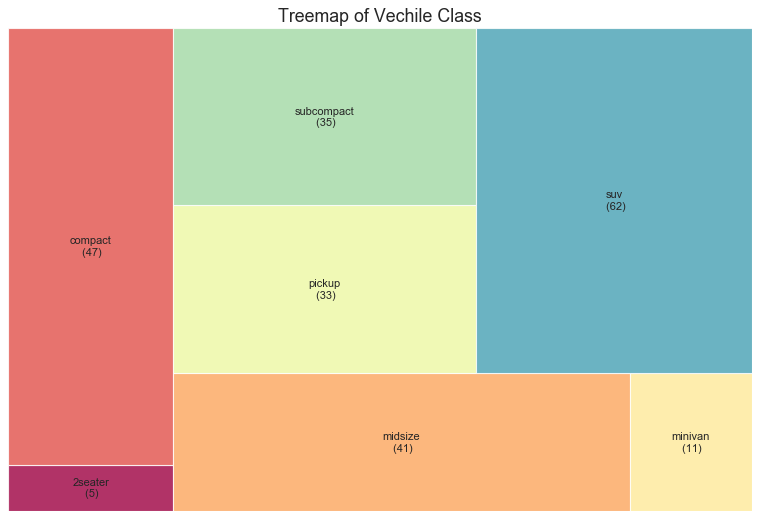

In [13]:
#图例
#apply()+lambda 表示对行/列进行操作(lambda)
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")"
                  , axis=1 #对每一行进行apply操作
                 )
#labels 为Series类型

#输入图像的值（占比）
sizes = df['counts'].values.tolist()
# 也可sizes = df['counts'].values

#颜色
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

#绘制图像
plt.figure(figsize=(12,8), dpi= 80)
#la=[1,1,1,1,1,1,1],label可为list或Series
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

#装饰图像
plt.title('Treemap of Vechile Class')
plt.axis('off') #不显示坐标轴，还记得我们在绘制坡度图的时候如何设置不显示坐标轴么？当时我们全程是fig + ax的操作。
plt.show()

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 34/50 条形图

条形图是最常见的图像之一。通常我们使用条形图，我们会考虑两个特征，以表达趋势，进行对比（就像我们在排序图中做的那样）。  
但事实上，条形图作为一种简单的几何图像，也可以表示为组成图像。  
当我们以不同车辆名称为横坐标，不同车辆名称下的样本数量为纵坐标，即可看出整个数据集中，每个车辆品牌所占的不同比例。  
**比起饼图或者华夫饼图，条形图在类别很多的时候有天生的优势——即便有很多类别，也能够显示得非常清楚。**

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/%E6%9D%A1%E5%BD%A2%E5%9B%BE.PNG" align="center" />

### 1. 导入需要的库

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### 2. 导入数据，准备数据

In [2]:
#导入数据，准备数据
df_raw = pd.read_csv("data/mpg_ggplot2.csv")
df = df_raw.groupby('manufacturer').size().reset_index(name='counts')

In [3]:
df

,manufacturer,counts
0,audi,18
1,chevrolet,19
2,dodge,37
3,ford,25
4,honda,9
5,hyundai,14
6,jeep,8
7,land rover,4
8,lincoln,3
9,mercury,4


#### **建立颜色列表的新方式**

In [12]:
#我们一直以来都使用光谱来进行取色，或者输入颜色的名字，还有其他方法么？

import random

all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100) #设置随机数种子,100表示模式编号
n = df['manufacturer'].unique().__len__() #需要取出多少种颜色？=len( df['manufacturer'].unique())
c = random.choices(all_colors, k=n) #random.choice，从一个列表中取出k个值

In [13]:
len( df['manufacturer'].unique())

15

In [14]:
plt.cm.colors.cnames.keys() # 所有可能使用到的名字
# plt.cm.tab10(float)

dict_keys(['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lights

In [15]:
df['manufacturer'].unique().__len__()

15

In [16]:
c

['darkblue',
 'lightblue',
 'peru',
 'olivedrab',
 'palegoldenrod',
 'lavenderblush',
 'purple',
 'lightslategray',
 'brown',
 'lightblue',
 'black',
 'teal',
 'tomato',
 'gainsboro',
 'firebrick']

### 3. 代码解析&图像解读

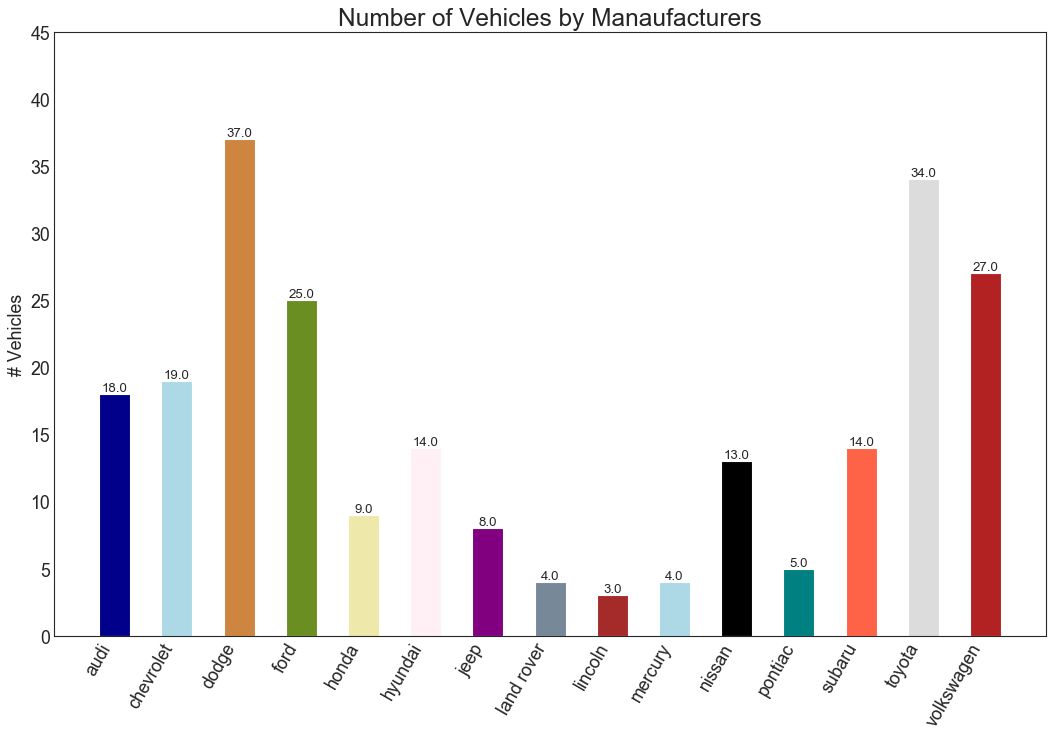

In [17]:
import random

#绘制图像
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df['manufacturer'], df['counts'], color=c, width=.5) #width 取0~1
# vlines

#柱状图上写上文字 verticalalignment='bottom'点在文字下方
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

#装饰图像
plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment= 'right')
plt.title("Number of Vehicles by Manaufacturers", fontsize=22)
plt.ylabel('# Vehicles')
plt.ylim(0, 45)
plt.show()

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />